In [5]:
# import from requirements.txt
!pip install -r requirements.txt

/bin/bash: pip: command not found


## Define our embedding function
Check out the openai API if you have issues: https://platform.openai.com/docs/api-reference

In [6]:
from openai import OpenAI
import numpy as np
import os
from dotenv import load_dotenv

# Load the API key from the .env file

load_dotenv()
api_key = os.getenv("OPENAI_API_KEY")

client = OpenAI(api_key=api_key)    # Initialize the OpenAI client


def get_embeddings_batch(inputs):
    # Call the OpenAI API to get the embeddings for a batch of inputs
    response = client.embeddings.create(
        input=inputs,
        model="text-embedding-3-large"
    )

    # Extract the embeddings
    embeddings = np.array([item.embedding for item in response.data])
    return embeddings




## Turn our data into embeddings

In [7]:
example_data = ["Literary Study", "Individual in Society", "American Literature", "AP English Language and Composition", "World Literature", "AP English Literature and Composition", "Creative Writing", "Ethical Philosophy", "Gender Studies", "Modernism: A Culture", "The Rise of Gothic and Horror in Literature", "Sports Literature", "Journalism", "Intermediate Algebra", "Geometry", "Algebra II", "Functions and Trignometry", "Pre-Calculus", "Calculus", "AP Statistics", "AP Calculus AB", "AP Calculus BC", "AP Computer Science Principles", "Problem Solving", "Intro to Programming", "Intermediate Programming", "Statistics", "Advanced Math Topics", "Discrete Math", "Biology", "AP Biology", "Chemistry", "AP Chemistry", "Physics", "AP Physics Mechanics", "STEM: Engineering I", "STEM: Engineering II", "STEM: Coding for Apps", "STEM: 3D Design", "STEM: Maker Lab", "Marine Biology: Vertebrate Zoology", "Marine Biology: Oceanography and Marine Ecosystems", "Environmental Science", "AP Environmental Science", "Immunology", "Neuroscience", "Forensics", "Cyber Crimes", "Astronomy", "Astrobiology", "Advanced Astronomy", "MEDscience", "MEDscience LAB", "Scientific Research Methods", "Nutritional Science", "BioEthics", "Ancient World History", "Modern World History", "United States History", "AP United States History", "AP Economics", "AP U.S. Government and Politics", "AP Comparative Government and Politics", "AP Art History", "AP Human Geography", "Developmental Psychology", "Abnormal Psychology", "British Imperalism: The Global Impact From Magna Carta to the Middle East", "History of Social Justice", "History of Boston", "Women in American History: From Salem to Steinem", "Modern Conflicts", "Constitutional Law: The Role of the Supreme Court", "Economics", "Modern American Society and Culture", "Today's China & Japan: History", "Culture, & Economy", "Understanding 9/11 - Attack and Aftermath", "The World Wards and the New World Order", "Latin I", "Latin II", "Latin III", "Latin Literature Honors I", "AP Latin", "Latin Literature II", "Spanish I", "Spanish II", "Spanish III", "Spanish IV", "Spanish V", "AP Spanish Language and Culture", "AP Spanish Literature", "French I", "French II", "French III", "French IV", "French V", "AP French Language and Culture", "Comparative Mythology", "Arabic Studies I", "Arabic Studies II", "History of Greco-Roman Mythology in Art", "History of Rome through Architecture", "Greek I", "Greek II", "World Cultures", "Art I: Visual Communication", "Drawing", "Painting", "Digital Photography", "Advanced Studio Art", "Watercolor", "Printmaking", "Sculpture", "Portfolio Preparation", "AP Studio Art", "Hand-Building Ceramics", "Ceramics", "World Music", "Music Theory", "AP Music Theory", "Ukulele", "Vocal Ensemble", "Ensemble", "Theatre I", "Theatre II", "From Page to Stage", "Ethics 9"]
embeddings = get_embeddings_batch(example_data)

## Reduce to 2 dimensions
Check out this guide for how umap works: https://pair-code.github.io/understanding-umap/

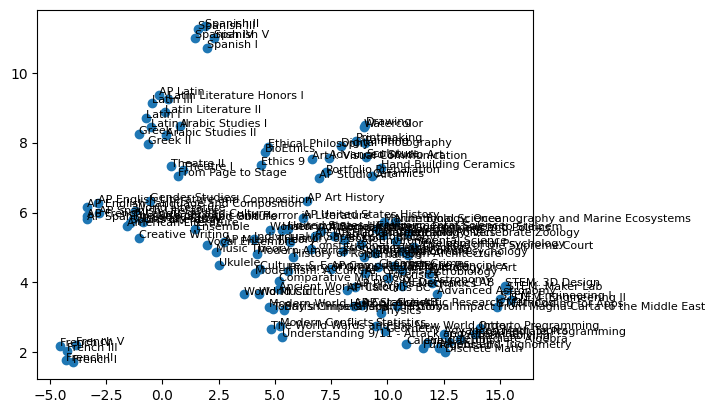

In [8]:
from umap import UMAP
import matplotlib.pyplot as plt


# set hyperparameters for umap. try playing around with them
n_neighbors = 4
min_dist = 0.2
n_components = 2
metric = 'cosine'

# Initialize the UMAP model
umap = UMAP(
    n_neighbors=n_neighbors,
    min_dist=min_dist,
    n_components=n_components,
    metric=metric
)

# Fit the UMAP model to the embeddings
reduced_embeddings = umap.fit_transform(embeddings)

# Plot the reduced embeddings
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1])
for i, text in enumerate(example_data):
    plt.text(reduced_embeddings[i, 0], reduced_embeddings[i, 1], text, fontsize=8)
plt.show()
